# Importing libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Loading Train, Validation and Test data

## Train Data

In [2]:
msg_train = pd.read_csv('train.csv')
msg_train

,label,message,length
0,0,"['you', 'gorgeous', '!', 'keep', 'pix', 'cummi...",10
1,1,"['you', '?', '1,000', 'cash', '?', '2,000', 'p...",23
2,0,"['i', 'sent', '.', 'do', 'like', '?']",6
3,0,"['quite', 'late', 'lar', '...', 'ard', '12', '...",11
4,0,"['beautiful', 'tomorrow', 'never', 'come', '.....",24
...,...,...,...
3896,0,"['hi', ',', 'wlcome', 'back', ',', 'wonder', '...",13
3897,1,"['ree', 'entry', '2', 'weekly', 'comp', 'chanc...",27
3898,0,"['``', 'oh', 'fuck', '.', 'juswoke', 'up', 'in...",31
3899,0,"['not', 'much', 'no', 'fights', '.', 'it', 'wa...",12


## Validation Data

In [3]:
msg_val = pd.read_csv('validation.csv')
msg_val

,label,message,length
0,0,"['book', 'lesson', '?', 'msg', '...', 'i', 'ca...",19
1,0,"['fuuuuck', 'i', 'need', 'stop', 'sleepin', ',...",7
2,0,"['hi', 'yijue', ',', 'meet', 'u', '11', 'tmr',...",8
3,0,"['its', '.', 'still', 'looking', 'job', '.', '...",12
4,0,"['lul', 'im', 'gettin', 'juicy', 'gossip', 'ho...",21
...,...,...,...
831,0,"['tmr', 'timin', 'still', 'da', 'wat', 'co', '...",10
832,0,"['lmao', '.', 'take', 'pic', 'send', '.']",6
833,0,"['hi', 'msg', ':', ')', ""'m"", 'office', '..']",7
834,0,"['you', 'still', 'grand', 'prix', '?']",5


## Test Data

In [4]:
msg_test = pd.read_csv('test.csv')
msg_test

,label,message,length
0,0,"['yup', ""'m"", 'elaborating', 'safety', 'aspect...",7
1,0,"['ü', 'write', 'wat', '..']",4
2,1,"['bored', 'housewife', '!', 'chat', 'n', 'date...",14
3,0,"['and', 'one', 'teach', 'ship', 'car', '.']",6
4,0,"['awesome', ',', 'i', ""'ll"", 'see', 'bit']",6
...,...,...,...
832,0,"['i', 'tot', 'u', 'reach', 'liao', '.', 'he', ...",10
833,0,"['well', 'weather', 'cali', ""'s"", 'great', '.'...",29
834,0,"['ooh', ',', '4got', ',', ""'m"", 'gon', 'na', '...",20
835,0,"['as', 'per', 'request', ""'maangalyam"", '(', '...",18


# Metrics for Model Evaluation

In [5]:
# function for calculating accuracy
def accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

In [6]:
# function for calculating precision
def precision(y_true, y_pred):
    return precision_score(y_true, y_pred, pos_label=1) # spam is the positive label

In [7]:
# function for calculating recall
def  recall(y_true, y_pred):
    return recall_score(y_true, y_pred, pos_label=1) # spam is the positive label

In [8]:
# function for calculating f1-score
def f1(y_true, y_pred):
    return f1_score(y_true, y_pred, pos_label=1) # spam is the positive label

In [9]:
# function for calculating PR AUC
def pr_auc(y_true, y_pred):
    p, r, _ = precision_recall_curve(y_true, y_pred, pos_label=1) # spam is the positive label
    return auc(r, p)

# Model Selection

We choose to use the following three models for spam/ham classification and record their Accuracy, Precision, Recall, F1-score and Area under the Precision-Recall respectively.

1. Naive Bayes
2. Logistic Regression
3. Support Vector Machine

# 1. Naive Bayes Classifier

In [10]:
MultinomialNB().get_params() # Multinomial Naive Bayes

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

## Creating pipeline

In [11]:
pipeline_nb = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Fitting the model on train data

In [12]:
pipeline_nb.fit(msg_train['message'], msg_train['label'])

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Performance on Train Data

In [13]:
predictions = pipeline_nb.predict(msg_train['message'])

# Evaluate model on the training data
print("On training data")
print("Accuracy: ", round(accuracy(msg_train['label'], predictions),5))
print("Precision: ", round(precision(msg_train['label'], predictions),5))
print("Recall: ", round(recall(msg_train['label'], predictions),5))
print("F1: ", round(f1(msg_train['label'], predictions),5))
print("PR AUC: ", round(pr_auc(msg_train['label'], predictions),5))

On training data
Accuracy:  0.98052
Precision:  1.0
Recall:  0.85413
F1:  0.92133
PR AUC:  0.9368


Precision-Recall Curve

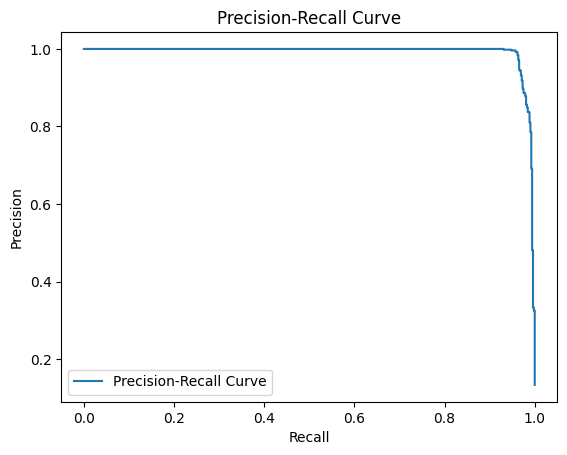

In [14]:
p, r, t = precision_recall_curve(msg_train['label'], pipeline_nb.predict_proba(msg_train['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Confusion Matrix

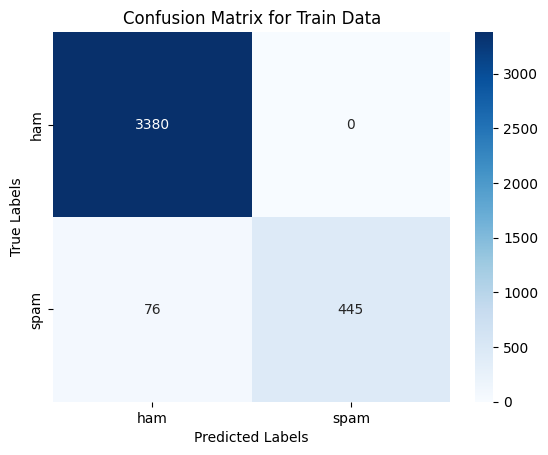

In [15]:
cm = confusion_matrix(msg_train['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Train Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Performance on Validation Data

In [16]:
predictions = pipeline_nb.predict(msg_val['message'])

# Evaluate model on the validation data
print("On validation data")
print("Accuracy: ", round(accuracy(msg_val['label'], predictions),5))
print("Precision: ", round(precision(msg_val['label'], predictions),5))
print("Recall: ", round(recall(msg_val['label'], predictions),5))
print("F1: ", round(f1(msg_val['label'], predictions),5))
print("PR AUC: ", round(pr_auc(msg_val['label'], predictions),5))

On validation data
Accuracy:  0.96651
Precision:  1.0
Recall:  0.75439
F1:  0.86
PR AUC:  0.89394


Precision-Recall Curve

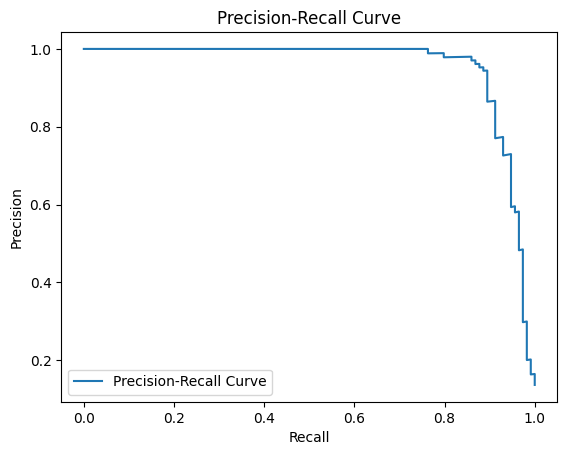

In [17]:
p, r, t = precision_recall_curve(msg_val['label'], pipeline_nb.predict_proba(msg_val['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Confusion Matrix

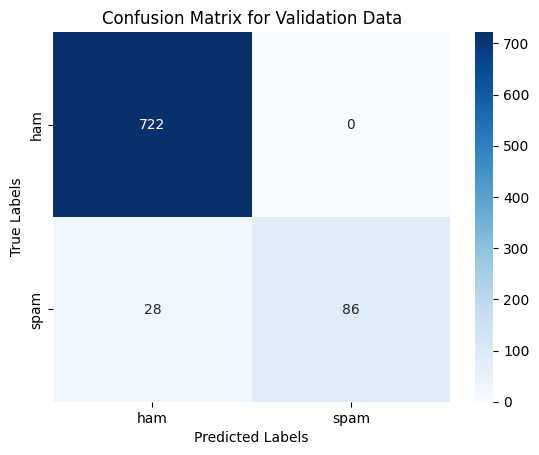

In [18]:
cm = confusion_matrix(msg_val['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Validation Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Hyperparameter tuning

Let's tune the alpha parameter of the Naive Bayes classifier.

In [19]:
param_grid = {
    'classifier__alpha': [0.05, 0.1, 0.2, 0.5, 1],
}

NB_Classifier = GridSearchCV(pipeline_nb, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
NB_Classifier.fit(msg_train['message'], msg_train['label'])

print("Best parameters:", NB_Classifier.best_params_)
print("Best f1 score:", NB_Classifier.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'classifier__alpha': 0.05}
Best f1 score: 0.93875509458073


### Performance on Train Data

In [20]:
predictions = NB_Classifier.predict(msg_train['message'])

# Evaluate model on the training data
print("On training data")
print("Accuracy: ", round(accuracy(msg_train['label'], predictions),5))
print("Precision: ", round(precision(msg_train['label'], predictions),5))
print("Recall: ", round(recall(msg_train['label'], predictions),5))
print("F1: ", round(f1(msg_train['label'], predictions),5))
print("PR AUC: ", round(pr_auc(msg_train['label'], predictions),5))

On training data
Accuracy:  0.99923
Precision:  1.0
Recall:  0.99424
F1:  0.99711
PR AUC:  0.99751


Precision-Recall Curve

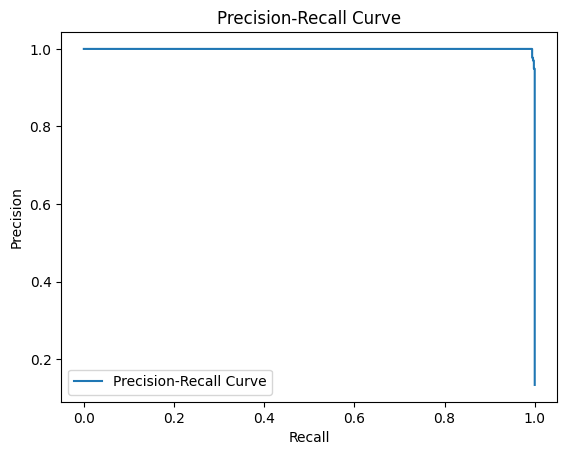

In [21]:
p, r, t = precision_recall_curve(msg_train['label'], NB_Classifier.predict_proba(msg_train['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Confusion Matrix

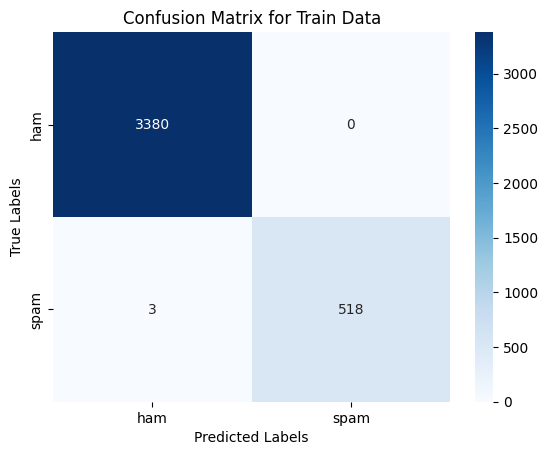

In [22]:
cm = confusion_matrix(msg_train['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Train Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Performance on Validation Data

In [23]:
predictions = NB_Classifier.predict(msg_val['message'])

# Evaluate model on the validation data
print("On validation data")
print("Accuracy: ", round(accuracy(msg_val['label'], predictions),5))
print("Precision: ", round(precision(msg_val['label'], predictions),5))
print("Recall: ", round(recall(msg_val['label'], predictions),5))
print("F1: ", round(f1(msg_val['label'], predictions),5))
print("PR AUC: ", round(pr_auc(msg_val['label'], predictions),5))

On validation data
Accuracy:  0.98206
Precision:  0.97143
Recall:  0.89474
F1:  0.93151
PR AUC:  0.94026


Precision-Recall Curve

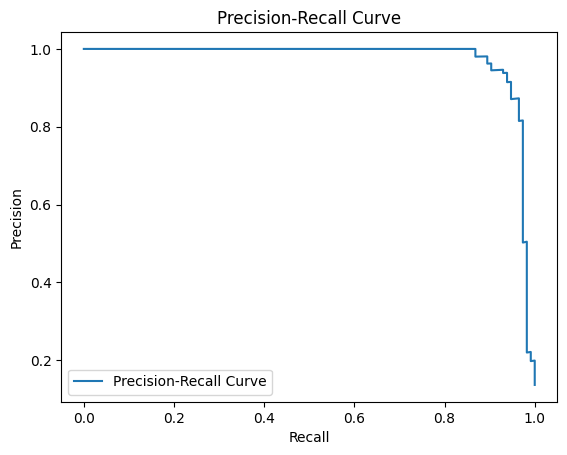

In [24]:
p, r, t = precision_recall_curve(msg_val['label'], NB_Classifier.predict_proba(msg_val['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Confusion Matrix

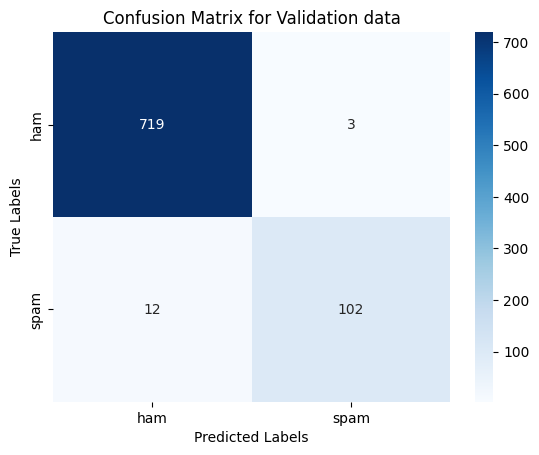

In [25]:
cm = confusion_matrix(msg_val['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Validation data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 2. Logistic Regression

In [26]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Creating Pipeline

In [27]:
pipeline_LR = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(random_state=42, max_iter=500))  # train on TF-IDF vectors w/ logistic regression
])

## Fitting the model

In [28]:
pipeline_LR.fit(msg_train['message'], msg_train['label'])

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier',
                 LogisticRegression(max_iter=500, random_state=42))])

### Performance on Train Data

In [29]:
predictions = pipeline_LR.predict(msg_train['message'])

# Evaluate model on the training data
print("On training data")
print("Accuracy: ", round(accuracy(msg_train['label'], predictions),5))
print("Precision: ", round(precision(msg_train['label'], predictions),5))
print("Recall: ", round(recall(msg_train['label'], predictions),5))
print("F1: ", round(f1(msg_train['label'], predictions),5))
print("PR AUC: ", round(pr_auc(msg_train['label'], predictions),5))

On training data
Accuracy:  0.97052
Precision:  0.99272
Recall:  0.78503
F1:  0.87674
PR AUC:  0.90323


Precision-Recall Curve

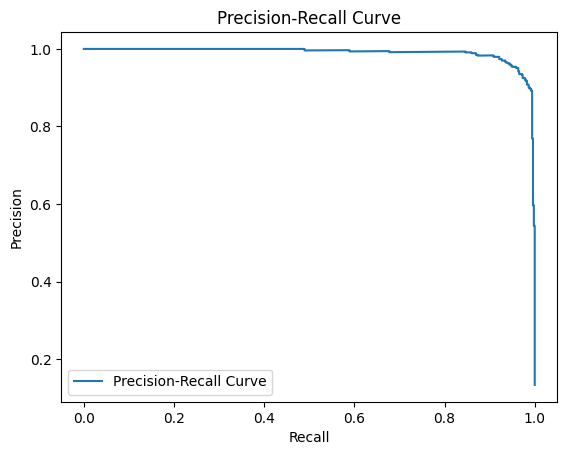

In [30]:
p, r, t = precision_recall_curve(msg_train['label'], pipeline_LR.predict_proba(msg_train['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Confusion Matrix

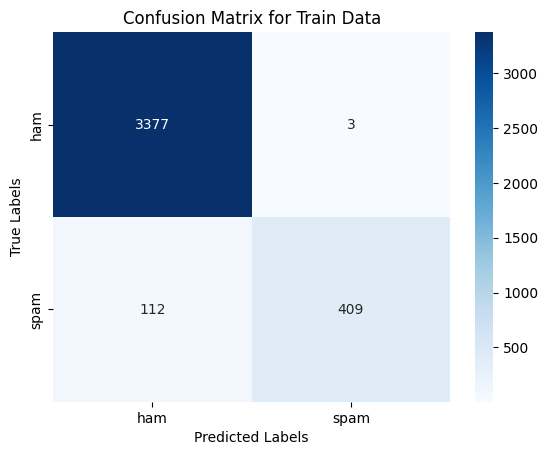

In [31]:
cm = confusion_matrix(msg_train['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Train Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Performance on Validation Data

In [32]:
predictions = pipeline_LR.predict(msg_val['message'])

# Evaluate model on the validation data
print("On validation data")
print("Accuracy: ", round(accuracy(msg_val['label'], predictions),5))
print("Precision: ", round(precision(msg_val['label'], predictions),5))
print("Recall: ", round(recall(msg_val['label'], predictions),5))
print("F1: ", round(f1(msg_val['label'], predictions),5))
print("PR AUC: ", round(pr_auc(msg_val['label'], predictions),5))

On validation data
Accuracy:  0.96172
Precision:  0.95556
Recall:  0.75439
F1:  0.84314
PR AUC:  0.87172


Precision-Recall Curve

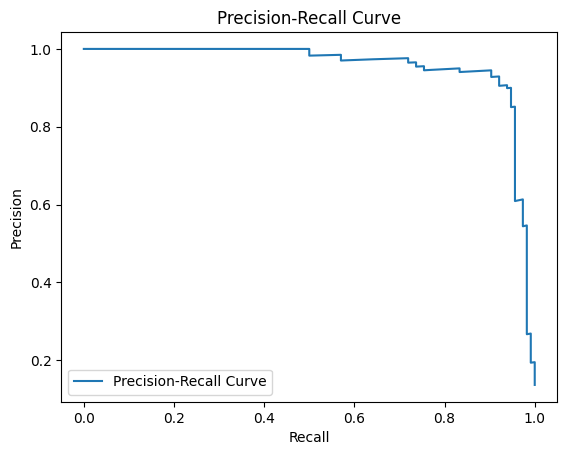

In [33]:
p, r, t = precision_recall_curve(msg_val['label'], pipeline_LR.predict_proba(msg_val['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Confusion Matrix

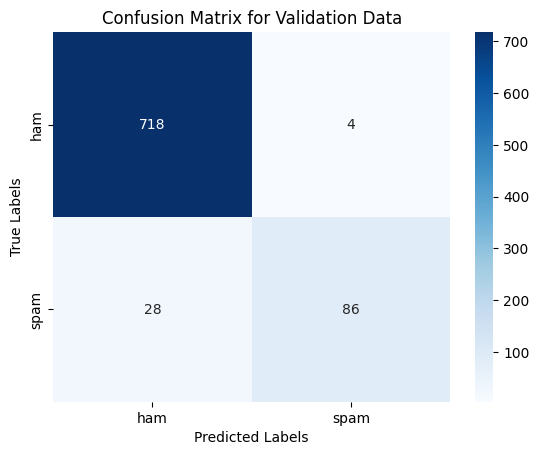

In [34]:
cm = confusion_matrix(msg_val['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Validation Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Hyperparameter tuning

In [35]:
param_grid = {
    'classifier__C': [1, 5, 10, 25, 50],
    'classifier__class_weight': [None, 'balanced']
}

LR_Classifier = GridSearchCV(pipeline_LR, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
LR_Classifier.fit(msg_train['message'], msg_train['label'])

print("Best parameters:", LR_Classifier.best_params_)
print("Best f1 score:", LR_Classifier.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'classifier__C': 50, 'classifier__class_weight': 'balanced'}
Best f1 score: 0.9497093145363502


### Performance on Train Data

In [36]:
predictions = LR_Classifier.predict(msg_train['message'])

# Evaluate model on the training data
print("On training data")
print("Accuracy: ", round(accuracy(msg_train['label'], predictions),5))
print("Precision: ", round(precision(msg_train['label'], predictions),5))
print("Recall: ", round(recall(msg_train['label'], predictions),5))
print("F1: ", round(f1(msg_train['label'], predictions),5))
print("PR AUC: ", round(pr_auc(msg_train['label'], predictions),5))

On training data
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
PR AUC:  1.0


Precision-Recall Curve

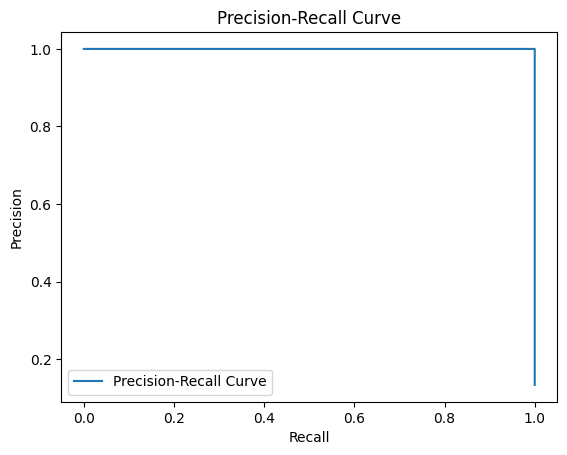

In [37]:
p, r, t = precision_recall_curve(msg_train['label'], LR_Classifier.predict_proba(msg_train['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Confusion Matrix

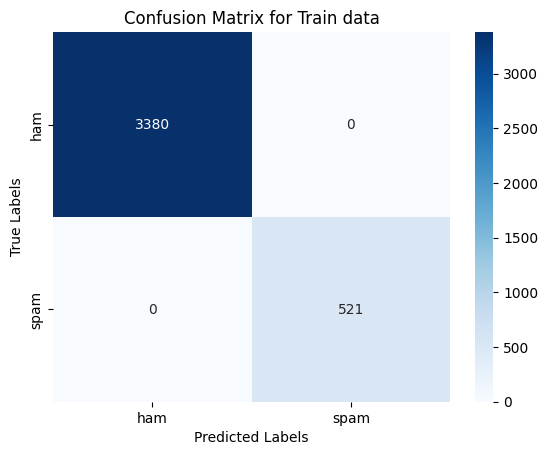

In [38]:
cm = confusion_matrix(msg_train['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Performance on Validation Data

In [39]:
predictions = LR_Classifier.predict(msg_val['message'])

# Evaluate model on the validation data
print("On validation data")
print("Accuracy: ", round(accuracy(msg_val['label'], predictions),5))
print("Precision: ", round(precision(msg_val['label'], predictions),5))
print("Recall: ", round(recall(msg_val['label'], predictions),5))
print("F1: ", round(f1(msg_val['label'], predictions),5))
print("PR AUC: ", round(pr_auc(msg_val['label'], predictions),5))

On validation data
Accuracy:  0.98445
Precision:  0.9469
Recall:  0.9386
F1:  0.94273
PR AUC:  0.94694


Precision-Recall Curve

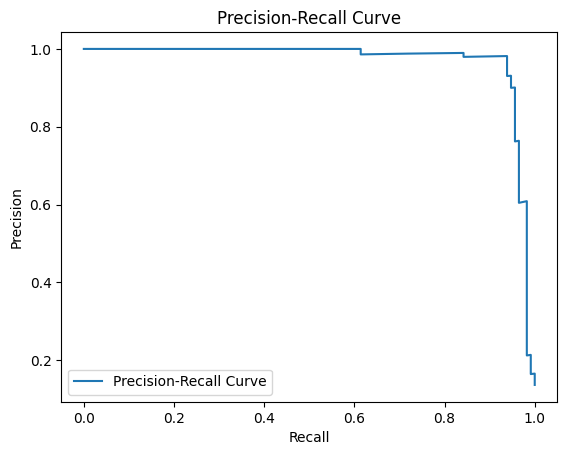

In [40]:
p, r, t = precision_recall_curve(msg_val['label'], LR_Classifier.predict_proba(msg_val['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Confusion Matrix

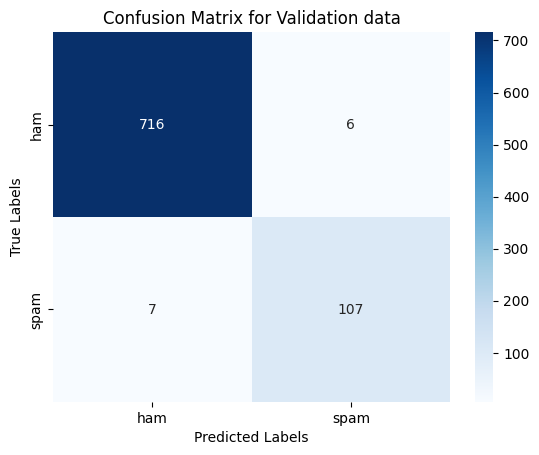

In [41]:
cm = confusion_matrix(msg_val['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Validation data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 3. Support Vector Machines

In [42]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Creating Pipeline

In [43]:
pipeline_svm = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC(probability=True, random_state=42))  # train on TF-IDF vectors w/ SVM classifier
])

## Fitting the model

In [44]:
pipeline_svm.fit(msg_train['message'], msg_train['label'])

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC(probability=True, random_state=42))])

### Performance on Train Data

In [45]:
predictions = pipeline_svm.predict(msg_train['message'])

# Evaluate model on the training data
print("On training data")
print("Accuracy: ", round(accuracy(msg_train['label'], predictions),5))
print("Precision: ", round(precision(msg_train['label'], predictions),5))
print("Recall: ", round(recall(msg_train['label'], predictions),5))
print("F1: ", round(f1(msg_train['label'], predictions),5))
print("PR AUC: ", round(pr_auc(msg_train['label'], predictions),5))

On training data
Accuracy:  0.99872
Precision:  1.0
Recall:  0.9904
F1:  0.99518
PR AUC:  0.99584


Precision-Recall Curve

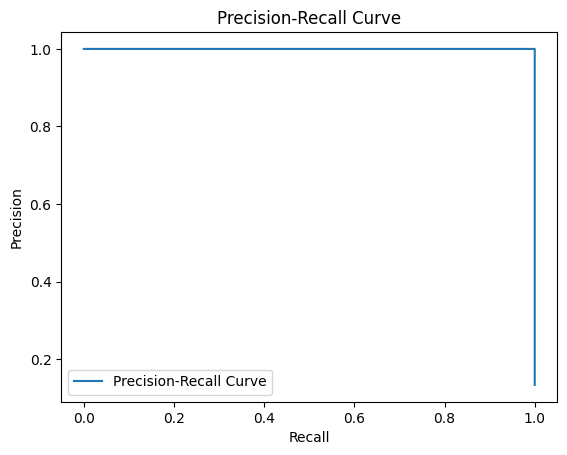

In [46]:
p, r, t = precision_recall_curve(msg_train['label'], pipeline_svm.predict_proba(msg_train['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Confusion Matrix

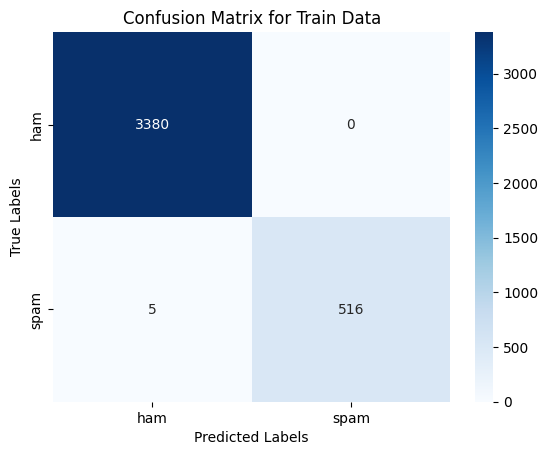

In [47]:
cm = confusion_matrix(msg_train['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Train Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Performance on Validation Data

In [48]:
predictions = pipeline_svm.predict(msg_val['message'])

# Evaluate model on the validation data
print("On validation data")
print("Accuracy: ", round(accuracy(msg_val['label'], predictions),5))
print("Precision: ", round(precision(msg_val['label'], predictions),5))
print("Recall: ", round(recall(msg_val['label'], predictions),5))
print("F1: ", round(f1(msg_val['label'], predictions),5))
print("PR AUC: ", round(pr_auc(msg_val['label'], predictions),5))

On validation data
Accuracy:  0.98206
Precision:  0.98058
Recall:  0.88596
F1:  0.93088
PR AUC:  0.94105


Precision-Recall Curve

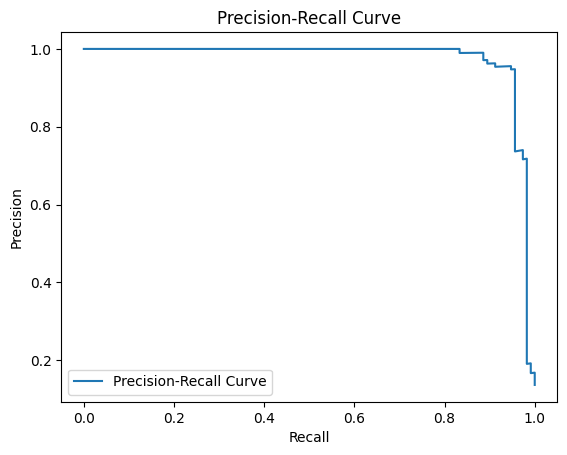

In [49]:
p, r, t = precision_recall_curve(msg_val['label'], pipeline_svm.predict_proba(msg_val['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

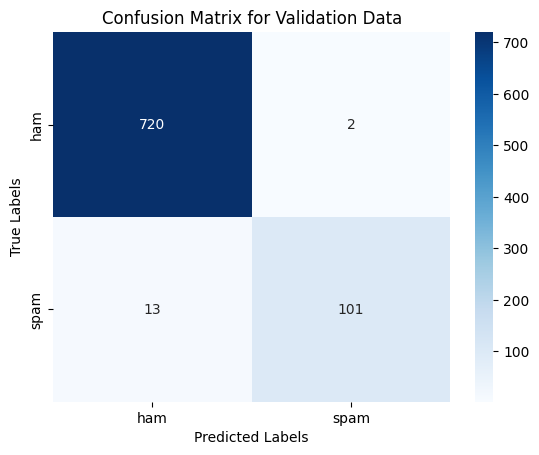

In [50]:
cm = confusion_matrix(msg_val['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Validation Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Hyperparameter tuning

In [51]:
param_grid = {
    'classifier__C': [0.5 ,1, 5, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

svm_classifier = GridSearchCV(pipeline_svm, param_grid, cv=4, scoring='f1',verbose=1, n_jobs=-1)
svm_classifier.fit(msg_train['message'], msg_train['label'])

print("Best parameters:", svm_classifier.best_params_)
print("Best f1 score:", svm_classifier.best_score_)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best parameters: {'classifier__C': 5, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best f1 score: 0.9507008816926898


### Performance on Train Data

In [52]:
predictions = svm_classifier.predict(msg_train['message'])

# Evaluate model on the training data
print("On training data")
print("Accuracy: ", round(accuracy(msg_train['label'], predictions),5))
print("Precision: ", round(precision(msg_train['label'], predictions),5))
print("Recall: ", round(recall(msg_train['label'], predictions),5))
print("F1: ", round(f1(msg_train['label'], predictions),5))
print("PR AUC: ", round(pr_auc(msg_train['label'], predictions),5))

On training data
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
PR AUC:  1.0


Precision-Recall Curve

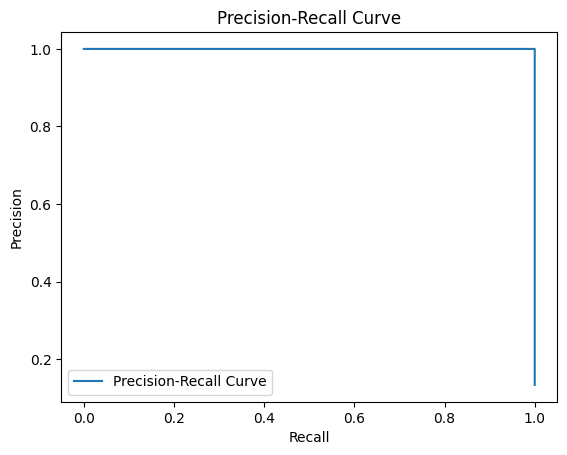

In [53]:
p, r, t = precision_recall_curve(msg_train['label'], svm_classifier.predict_proba(msg_train['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

 Confusion Matrix

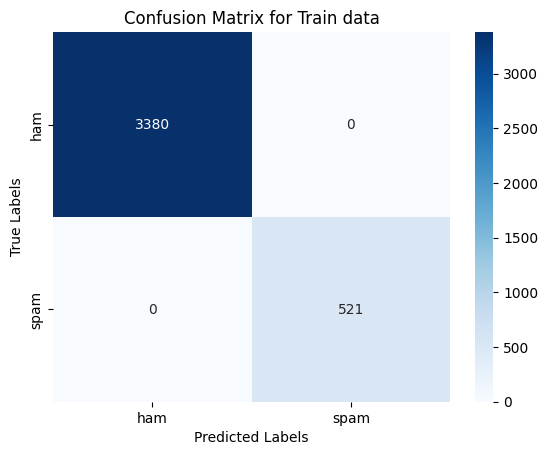

In [54]:
cm = confusion_matrix(msg_train['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Performance on Validation Data

In [55]:
predictions = svm_classifier.predict(msg_val['message'])

# Evaluate model on the validation data
print("On validation data")
print("Accuracy: ", round(accuracy(msg_val['label'], predictions),5))
print("Precision: ", round(precision(msg_val['label'], predictions),5))
print("Recall: ", round(recall(msg_val['label'], predictions),5))
print("F1: ", round(f1(msg_val['label'], predictions),5))
print("PR AUC: ", round(pr_auc(msg_val['label'], predictions),5))

On validation data
Accuracy:  0.98684
Precision:  0.97248
Recall:  0.92982
F1:  0.95067
PR AUC:  0.95594


Precision-Recall Curve

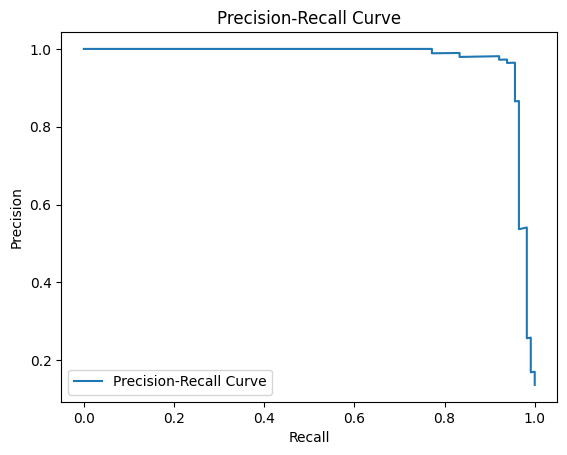

In [56]:
p, r, t = precision_recall_curve(msg_val['label'], svm_classifier.predict_proba(msg_val['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Confusion Matrix

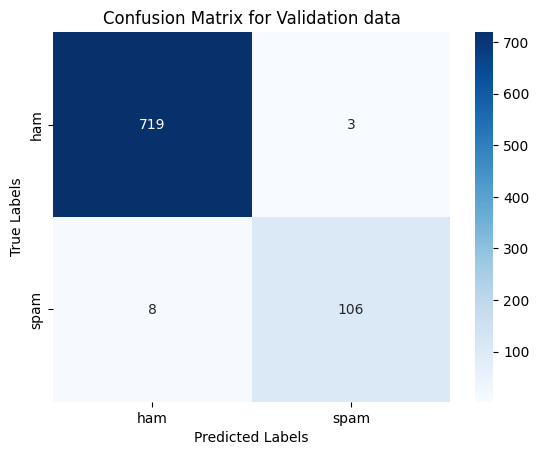

In [57]:
cm = confusion_matrix(msg_val['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Validation data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Testing the three models on the Test Data

In [58]:
models = [NB_Classifier, LR_Classifier, svm_classifier]

df = pd.DataFrame(np.zeros((3, 5)))
df.index = ["Naive Bayes", "Logistic Regression", "Support Vector Machines"]
df.columns = ["Accuracy", "Precision", "Recall", "f1 score", "AUC-PR"]


for i in range(3):
    model = models[i]
    predictions = model.predict(msg_test['message'])
    df.iloc[i,0] = (round(accuracy(msg_test["label"], predictions), 5)) 
    df.iloc[i,1] = (round(precision(msg_test['label'],predictions), 5)) 
    df.iloc[i,2] = (round(recall(msg_test['label'], predictions), 5)) 
    df.iloc[i,3] = (round(f1_score(msg_test['label'], predictions), 5)) 
    df.iloc[i,4] = (round(pr_auc(msg_test['label'], predictions), 5))


In [59]:
# Compare the performance on the Test data
df

,Accuracy,Precision,Recall,f1 score,AUC-PR
Naive Bayes,0.98686,0.97196,0.92857,0.94977,0.95505
Logistic Regression,0.98327,0.93750,0.93750,0.93750,0.94168
Support Vector Machines,0.98925,0.99048,0.92857,0.95853,0.96430


# Best Model

We consider the following:
- Excessive spam can negatively impact user experience.
- Misclassifying ham as spam is more harmful than missing some spam.

Based on this, we prioritize high precision (to avoid misclassifying ham as spam) over high recall (since capturing all spam is less critical).

Since all models achieve a recall greater than 0.92 (meaning they are all fairly good at detecting spam), and Support Vector Machines has the highest precision (and also the highest f1 score and AUC-PR ), it is the best choice for spam/ham classification.